In [74]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [128]:
sns.set_palette("pastel")

In [76]:
projects = pd.read_csv("projects.csv").drop("Unnamed: 0", axis=1)
projects.head()

,title,type,address,price,built_area,private_area,status,bedrooms,bathrooms,parking_slots,finishes,stratum,developers,country,city,zone
0,urbana 30,apartamento en venta en bogotá,carrera 30 no. 13a - 33,193000000,35.00,30.00,sobre planos,1,1,NaN,sin acabados,4,constructora bolívar,colombia,bogota,centro
1,bauhaus 4 - 23,apartaestudio en venta en bogotá,calle 24 no. 4a - 15,169500000,25.00,22.37,sobre planos,1,1,comunal,con acabados,3,buenvivir,colombia,bogota,centro
2,bauhaus 4 - 23,apartamento en venta en bogotá,calle 24 no. 4a - 15,169500000,25.00,22.37,sobre planos,1,1,comunal,con acabados,3,buenvivir,colombia,bogota,centro
3,torre farfala,apartaestudio en venta en bogotá,calle 10 no. 30 -73,202587000,40.20,35.70,sobre planos,1,1,comunal,con acabados,3,kuman s.a.s,colombia,bogota,centro
4,aruma,apartaestudio en venta en bogotá,calle 6 no. 18 - 04,140000000,28.00,24.00,sobre planos,1,1,comunal,con semiacabados,3,alcabama,colombia,bogota,centro


# 1. Tipos de datos.

In [77]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          616 non-null    object 
 1   type           616 non-null    object 
 2   address        616 non-null    object 
 3   price          616 non-null    int64  
 4   built_area     616 non-null    float64
 5   private_area   608 non-null    float64
 6   status         616 non-null    object 
 7   bedrooms       616 non-null    int64  
 8   bathrooms      616 non-null    int64  
 9   parking_slots  470 non-null    object 
 10  finishes       616 non-null    object 
 11  stratum        616 non-null    object 
 12  developers     616 non-null    object 
 13  country        616 non-null    object 
 14  city           616 non-null    object 
 15  zone           616 non-null    object 
dtypes: float64(2), int64(3), object(11)
memory usage: 77.1+ KB


Encontramos que **parking_slots** es la única columna con campos nulos.

Analicemos los valores de la columna **parking_slots**.

In [78]:
projects["parking_slots"].unique()

array([nan, 'comunal', '1', '4', '3', '2'], dtype=object)

La columna **parking_slots** está compuesta predominantemente por datos númericos.


Interpretamos el valor **comunal** como propiedades que no tienen puesto de estacionamiento propio.


Reemplacemos el valor **nan** y **comunal** por el número 0 y cambiemos el tipo de dato de la columna.

In [79]:
condition = (projects["parking_slots"] == "comunal") | (projects["parking_slots"].isna())
projects["parking_slots"][condition] = "0"



C:\Users\Diego Estrada\AppData\Local\Temp\ipykernel_3588\4028867744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projects["parking_slots"][condition] = "0"


In [81]:
projects["parking_slots"].unique()

array(['0', '1', '4', '3', '2'], dtype=object)

La columna **parking_slots** ya no contiene valores **Nan** o **comunal**.


Procedemos a cambiar el tipo de datos de **parking_slots** de *object* a *int*.

In [82]:
projects["parking_slots"] = projects["parking_slots"].astype(int)
projects["parking_slots"].dtype

dtype('int32')

La columna **type** podemos simplificarla a *apartamento*, *apartaestudio* y *casa*.


También debemos eliminar las observaciones de *apartamento en venta en zipaquirá* ya
que estamos trabajando con un dataset exclusivo de propiedades nuevas en Bogotá.

In [83]:
projects["type"].unique()

array(['apartamento en venta en bogotá',
       'apartaestudio en venta en bogotá', 'casa en venta en bogotá',
       'apartamento en venta en zipaquirá'], dtype=object)

In [ ]:
projects["type"][projects["type"] == "apartamento en venta en bogotá"] = "apartamento"
projects["type"][projects["type"] == "apartaestudio en venta en bogotá"] = "apartaestudio"
projects["type"][projects["type"] == "casa en venta en bogotá"] = "casa"

In [92]:
wrong_element = projects["type"][projects["type"] == "apartamento en venta en zipaquirá"].index
projects.drop(wrong_element, axis="index", inplace=True)

Todo parece estar bien con el resto de las columnas con valores categóricos.

In [95]:
projects["status"].unique()

array(['sobre planos', 'en construcción', 'terminado'], dtype=object)

In [101]:
projects["finishes"].unique()

array(['sin acabados', 'con acabados', 'con semiacabados', 'obra gris'],
      dtype=object)

In [99]:
projects["stratum"] = projects["stratum"].str.lower()
projects["stratum"].unique()

array(['4', '3', '5', '6', 'por definir', '2', '1'], dtype=object)

In [102]:
projects["developers"].unique()

array(['constructora bolívar', 'buenvivir', 'kuman s.a.s', 'alcabama',
       'icono urbano', 'constructora capital bogotá', 'akila',
       'coninsa ramón h', 'actual inmobiliaria', 'amarilo',
       'conaltura - vertikal', 'marval', 'apiros', 'ic constructora',
       'cusezar', 'dyc proyectos', 'metrika construcciones s.a.s',
       'compensar', 'ar construcciones', 'reserva del otoñal',
       'constructora ospina asociados', 'umbral propiedad raíz',
       'colombiana de edificaciones', 'residere sas', 'cumbrera s.a.s.',
       'camarth construcciones',
       'ambientti constructora inmobiliaria s.a', 'acierto inmobiliario',
       'proksol', 'compacta sas', 'contein', 'vavilco',
       'pco proyectos de construccion y obras civiles s.a.s.', 'prodesa',
       'ingeurbe', 'ici inversiones y construcciones industrializadas',
       'grupo accanto', 'conconcreto', 'londoño gómez s.a.',
       'zitio construcciones s.a.s', 'incol s.a.s. / qyunza s.a.s',
       'constructora las galia

In [103]:
projects["zone"].unique()

array(['centro', 'norte', 'noroccidente', 'occidente', 'sur'],
      dtype=object)

# 2. Descripción del dataset.

In [104]:
projects.describe()

,price,built_area,private_area,bedrooms,bathrooms,parking_slots
count,615.00,615.00,607.00,615.00,615.00,615.00
mean,461817409.10,65.00,57.91,2.02,1.86,0.65
std,432110609.20,40.51,37.61,0.88,0.90,0.84
min,75540000.00,18.25,16.43,1.00,1.00,0.00
25%,186589524.50,38.00,32.60,1.00,1.00,0.00
50%,350480000.00,55.25,48.49,2.00,2.00,0.00
75%,552869385.00,79.20,70.86,3.00,2.00,1.00
max,4007000000.00,363.27,332.43,4.00,5.00,4.00


### Precio

Tomando en cuenta la columna **price** analicemos los valores max y min.

In [114]:
index = projects["price"].argmax()
projects.iloc[index]

title                   séptima avenida
type                        apartamento
address          carrera 7 no. 158 - 51
price                        4007000000
built_area                        66.90
private_area                      60.10
status                  en construcción
bedrooms                              2
bathrooms                             2
parking_slots                         1
finishes                   con acabados
stratum                               4
developers        umbral propiedad raíz
country                        colombia
city                             bogota
zone                              norte
Name: 118, dtype: object

Algo no está bien con dicha observación.


Un apartamento de 60.10 m2 en un estrato medio no puede valer COP 4.007.000.000.


Claramente es un error. Procedamos a eliminar dicha entrada.

In [116]:
index = projects["price"].argmax()
projects.drop(index, axis="index", inplace=True)

Analicemos el nuevo valor máximo.

In [119]:
index = projects["price"].argmax()
projects.iloc[index]

title              reserva de la sierra
type                        apartamento
address          carrera 7 no. 126 - 30
price                        3997794000
built_area                       363.27
private_area                     332.43
status                        terminado
bedrooms                              3
bathrooms                             5
parking_slots                         2
finishes                   con acabados
stratum                               6
developers                       marval
country                        colombia
city                             bogota
zone                              norte
Name: 181, dtype: object

El nuevo valor máximo en la columna **price** corresponde a un apartamento de 332 m2 ubicado en estrato alto.


Podemos suponer que no hay ningún error con esta observación.


Analicemos el valor mínimo de la columna **price**.

In [123]:
index = projects["price"].argmin()
projects.iloc[index]

title            la alegría iv de la marlene
type                             apartamento
address            diagonal 37a no. 17 - 163
price                               75540000
built_area                             29.93
private_area                           26.30
status                          sobre planos
bedrooms                                   1
bathrooms                                  1
parking_slots                              0
finishes                           obra gris
stratum                          por definir
developers                           cusezar
country                             colombia
city                                  bogota
zone                                     sur
Name: 598, dtype: object

El valor mínimo de la columna **price** corresponde a un apartamento de 26 m2 ubicado en estrato bajo.


Podemos suponer que no hay ningún error con esta observación.

In [124]:
projects.describe()

,price,built_area,private_area,bedrooms,bathrooms,parking_slots
count,614.00,614.00,606.00,614.00,614.00,614.00
mean,456043496.09,65.00,57.91,2.02,1.86,0.65
std,408029186.96,40.54,37.64,0.88,0.90,0.84
min,75540000.00,18.25,16.43,1.00,1.00,0.00
25%,186294762.25,38.00,32.59,1.00,1.00,0.00
50%,350480000.00,55.12,48.49,2.00,2.00,0.00
75%,552838770.00,79.30,70.93,3.00,2.00,1.00
max,3997794000.00,363.27,332.43,4.00,5.00,4.00


Analizando el *promedio* y la *mediana* de la columna **price** nos damos cuenta
que existe una gran diferencia entre los dos. El promedio es mucho más alto
que la mediana.


Esto nos indica que la presencia de outliers está tirando del promedio hacia
la derecha. Probablemente estamos ante la presencia de una distribución claramente
inclinada hacia la derecha.


Por tal motivo, en este proyecto escogeremos la *mediana* como medida de tendencia
central para trabajar.

# 3. Distribución de los datos.

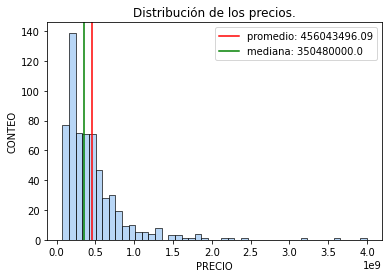

In [192]:
mean_price = projects["price"].mean()
median_price = projects["price"].median()

sns.histplot(data=projects, x="price")
plt.title("Distribución de los precios.")
plt.axvline(mean_price, c="r")
plt.axvline(median_price, c="g")
plt.xlabel("PRECIO")
plt.ylabel("CONTEO")
plt.legend([f"promedio: {mean_price.round(2)}", f"mediana: {median_price.round(2)}"])
plt.show()

### Interpretación:


Se cumple la sospecha inicial. Estamos ante la presencia de una distribución inclinada hacia la derecha.


La mayoría de los inmuebles se concentran alrededor de precios bajos con unos pocos outliers que tiran
del promedio hacia la derecha.

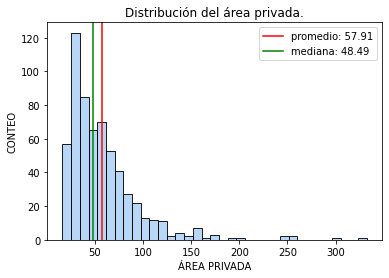

In [187]:
mean_area = projects["private_area"].mean()
median_area = projects["private_area"].median()

sns.histplot(data=projects, x="private_area")
plt.title("Distribución del área privada.")
plt.axvline(mean_area, c="r")
plt.axvline(median_area, c="g")
plt.xlabel("ÁREA PRIVADA")
plt.ylabel("CONTEO")
plt.legend([f"promedio: {mean_area.round(2)}", f"mediana: {median_area.round(2)}"])
plt.show()

### Interpretacion:

La distribución del área privada de los inmuebles también muestra una inclinación hacia la derecha.

# 4. Correlación de los datos númericos.